In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('winemag-data-130k-v2 2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
len(df)

129971

In [4]:
df.variety.describe()

count         129970
unique           707
top       Pinot Noir
freq           13272
Name: variety, dtype: object

## Find out how many null values exist and get rid of the features with the most null vals

In [5]:

df.isna().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [6]:
# region_2 and twitter handle have the most null values so dropping the column
df_cleaned1 = df.drop(['Unnamed: 0','region_2','taster_twitter_handle'],axis=1)
df_cleaned1

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [7]:
list(df_cleaned1.columns.values)

['country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'taster_name',
 'title',
 'variety',
 'winery']

In [8]:
rwo_df = pd.read_excel('Types of Wine - O, R, W.xlsx')
rwo_df.head()

,variety,color
0,Alvar Roxo,Orange
1,Ar110,Orange
2,Ar99,Orange
3,Barbarossa,Orange
4,Barbaroux,Orange


In [9]:
df_cleaned2 = df_cleaned1.merge(rwo_df, on='variety', how='left')
df_cleaned2.head()

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,color
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,White
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,Red
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,Orange
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,White
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,Red


In [10]:
df_cleaned2.isna().sum()

country           63
description        0
designation    37474
points             0
price           8998
province          63
region_1       21253
taster_name    26245
title              0
variety            1
winery             0
color          19918
dtype: int64

In [11]:
df_cleaned2.describe(include= 'all')

,country,description,designation,points,price,province,region_1,taster_name,title,variety,winery,color
count,129929,129992,92518,129992.000000,120994.000000,129929,108739,103747,129992,129991,129992,110074
unique,43,119955,37979,NaN,NaN,425,1229,19,118840,707,16757,3
top,US,"Ripe plum, game, truffle, leather and menthol ...",Reserve,NaN,NaN,California,Napa Valley,Roger Voss,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers,Red
freq,54512,3,2011,NaN,NaN,36249,4480,25516,11,13272,222,70747
mean,NaN,NaN,NaN,88.446851,35.361357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.039744,41.019738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,88.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_cleaned3= df_cleaned2.drop(['designation','province' ,'region_1', 'title','variety', 'winery'],axis=1)
df_cleaned3.head()

,country,description,points,price,taster_name,color
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Kerin O’Keefe,White
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Roger Voss,Red
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Paul Gregutt,Orange
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Alexander Peartree,White
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Paul Gregutt,Red


In [13]:
df_cleaned3.isna().sum()

country           63
description        0
points             0
price           8998
taster_name    26245
color          19918
dtype: int64

In [14]:
df_cleaned4 = df_cleaned3.dropna()
len(df_cleaned4)

81558

In [15]:
df_cleaned4.describe(include='all')


,country,description,points,price,taster_name,color
count,81558,81558,81558.000000,81558.000000,81558,81558
unique,40,74704,NaN,NaN,19,3
top,US,This zesty red has pretty aromas that suggest ...,NaN,NaN,Roger Voss,Red
freq,34274,3,NaN,NaN,16095,51936
mean,NaN,NaN,88.661443,36.546188,NaN,NaN
std,NaN,NaN,2.966901,44.771244,NaN,NaN
min,NaN,NaN,80.000000,4.000000,NaN,NaN
25%,NaN,NaN,87.000000,17.000000,NaN,NaN
50%,NaN,NaN,89.000000,26.000000,NaN,NaN
75%,NaN,NaN,91.000000,45.000000,NaN,NaN


# Potential target variables to Predict based on data above:
- color: there are 3 unique colors
- country: there are 7 unique countries
- points - below mean or above mean?
- price - below mean or above mean?
- taster name - based on the language they used?
- the variety of wine? - pinot noir etc (there are 434 total wine varieties)

## Word Vectorization

In [16]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk
np.random.seed(0)

In [17]:
df_cleaned4.description

1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
5         Blackberry and raspberry aromas show a typical...
6         Here's a bright, informal red that opens with ...
9         This has great depth of flavor with its fresh ...
10        Soft, supple plum envelopes an oaky structure ...
12        Slightly reduced, this wine offers a chalky, t...
14        Building on 150 years and six generations of w...
15        Zesty orange peels and apple notes abound in t...
16        Baked plum, molasses, balsamic vinegar and che...
17        Raw black-cherry aromas are direct and simple ...
18        Desiccated blackberry, leather, charred wood a...
20        Ripe aromas of dark berries mingle with ample ...
21        A sleek mix of tart berry, stem and herb, alon...
22        Delicate aromas recall white f

In [18]:
#need to convert to an array to get full review
experiment_line= str(df_cleaned4.description[2:3].values)
experiment_line

"['Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.']"

In [19]:
# experiment_line= df_cleaned4.description[2:3].to_string()

# clean_line = []
# # for word in experiment_line:

pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
line_tokens_raw = nltk.regexp_tokenize(experiment_line, pattern)
print(line_tokens_raw)    
    

['Pineapple', 'rind', 'lemon', 'pith', 'and', 'orange', 'blossom', 'start', 'off', 'the', 'aromas', 'The', 'palate', 'is', 'a', 'bit', 'more', 'opulent', 'with', 'notes', 'of', 'honey', 'drizzled', 'guava', 'and', 'mango', 'giving', 'way', 'to', 'a', 'slightly', 'astringent', 'semidry', 'finish']


In [84]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import *
stemmer = SnowballStemmer("english")

In [85]:
data = df_cleaned4.drop(['country','color','price','taster_name'], axis = 1)
data.describe()

,points
count,81558.000000
mean,88.661443
std,2.966901
min,80.000000
25%,87.000000
50%,89.000000
75%,91.000000
max,100.000000


In [86]:
data = data.convert_objects(convert_numeric=True)
data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,description,points
1,"This is ripe and fruity, a wine that is smooth...",87
2,"Tart and snappy, the flavors of lime flesh and...",87
3,"Pineapple rind, lemon pith and orange blossom ...",87
4,"Much like the regular bottling from 2012, this...",87
5,Blackberry and raspberry aromas show a typical...,87


In [87]:
data.points.describe()

count    81558.000000
mean        88.661443
std          2.966901
min         80.000000
25%         87.000000
50%         89.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

In [88]:
bins= [79,87,90,101]
names = ['Okay', 'Good', 'Excellent']
# first, create bins for based on the values observed. 11 values will result in 10 bins
# use pd.cut
# data['points_category'] = pd.cut(data['points'],bins, labels = names)
bins_points = pd.cut(data['points'], bins, labels = names)
bins_points = bins_points.cat.as_unordered()

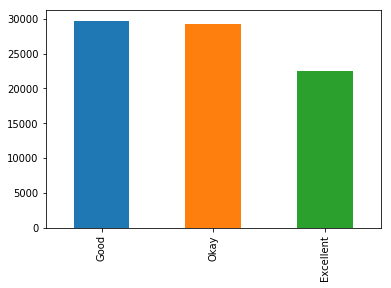

In [89]:
import matplotlib.pyplot as plt
bins_points.value_counts().plot(kind='bar')

In [90]:
data.points = bins_points
data.head

<bound method NDFrame.head of                                               description     points
1       This is ripe and fruity, a wine that is smooth...       Okay
2       Tart and snappy, the flavors of lime flesh and...       Okay
3       Pineapple rind, lemon pith and orange blossom ...       Okay
4       Much like the regular bottling from 2012, this...       Okay
5       Blackberry and raspberry aromas show a typical...       Okay
6       Here's a bright, informal red that opens with ...       Okay
9       This has great depth of flavor with its fresh ...       Okay
10      Soft, supple plum envelopes an oaky structure ...       Okay
12      Slightly reduced, this wine offers a chalky, t...       Okay
14      Building on 150 years and six generations of w...       Okay
15      Zesty orange peels and apple notes abound in t...       Okay
16      Baked plum, molasses, balsamic vinegar and che...       Okay
17      Raw black-cherry aromas are direct and simple ...       Okay
18  

In [91]:
numpy_array = data.as_matrix()
numpy_array

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([["This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.",
        'Okay'],
       ['Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.',
        'Okay'],
       ['Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.',
        'Okay'],
       ...,
       ["Notes of honeysuckle and cantaloupe sweeten this deliciously feather-light spätlese. It's intensely juicy, quenching the palate with streams of tart tangerine and grapefruit acidity, yet wraps up with a kiss of honey and peach.",
        'Good'],
       ['Citation is given as muc

In [92]:
X = numpy_array[:,0]
Y = numpy_array[:,1]
Y

array(['Okay', 'Okay', 'Okay', ..., 'Good', 'Good', 'Good'], dtype=object)

In [93]:
type(Y)

numpy.ndarray

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 

text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')),
 ('tfidf', TfidfTransformer()),
 ('clf', MultinomialNB()),
])

text_clf = text_clf.fit(X_train,Y_train)

predicted = text_clf.predict(X_test)
np.mean(predicted == Y_test)

0.6449852869053457

In [ ]:
#Creates a datafram for word vectors

# pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
# stop_words = set(stopwords.words('english'))

# #figure out how to concatenate eveything back together
# for line in descriptions:
#     article_tokens_raw = nltk.regexp_tokenize(descriptions, pattern)
#     article_tokens = [i.lower() for i in article_tokens_raw]
#     article_tokens_stopped = [w for w in article_tokens if not w in stop_words]
# #     art_stemmed = [stemmer.stem(word) for word in article_tokens_stopped]
#     docs = article_tokens_stopped
#     vec = CountVectorizer()
#     X = vec.fit_transform(docs)
#     df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

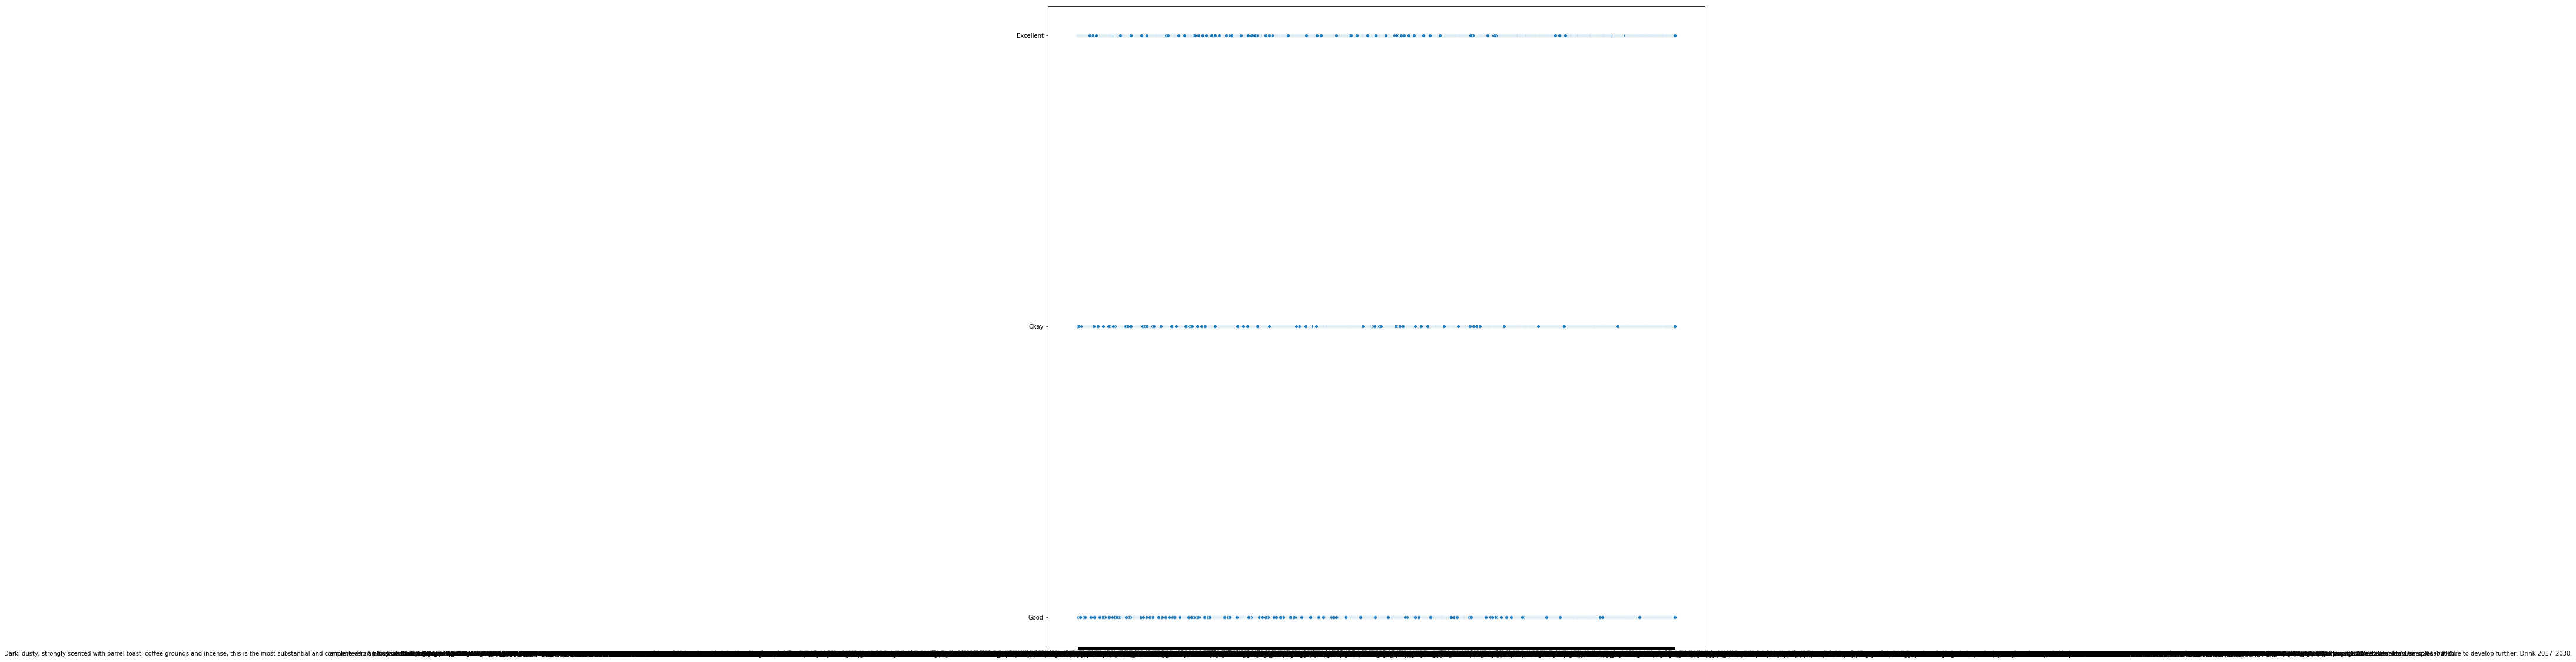

In [95]:
import seaborn as sns
fig = plt.figure(figsize = (20,20))
sns.scatterplot(x = X_test, y = Y_test)